# Lab 2 (Millican)

In [47]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Problem 1)
For my noise measurement I have decided that my noise value per day is 2 detected rays and the actual average number of gamma rays for one day is 5. 

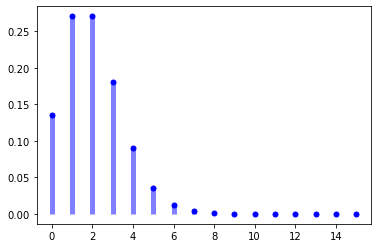

In [74]:
mu = 5; err_mu = 2; offset = 0
x = np.linspace(0, 15, 16)
err_y = stats.poisson.pmf(x, err_mu, offset)
plt.plot(x, stats.poisson.pmf(x, err_mu, offset), 'bo', lw=0, ms=5)
plt.vlines(x, 0, stats.poisson.pmf(x, err_mu, offset), colors='b', lw=5, alpha=0.5)

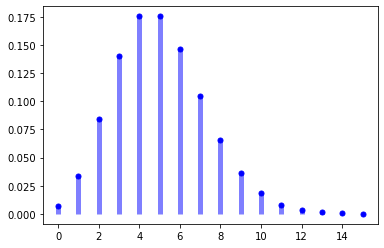

In [75]:
x = np.linspace(0, 15, 16)
err_y = stats.poisson.pmf(x, mu, offset)
plt.plot(x, stats.poisson.pmf(x, mu, offset), 'bo', lw=0, ms=5)
plt.vlines(x, 0, stats.poisson.pmf(x, mu, offset), colors='b', lw=5, alpha=0.5)

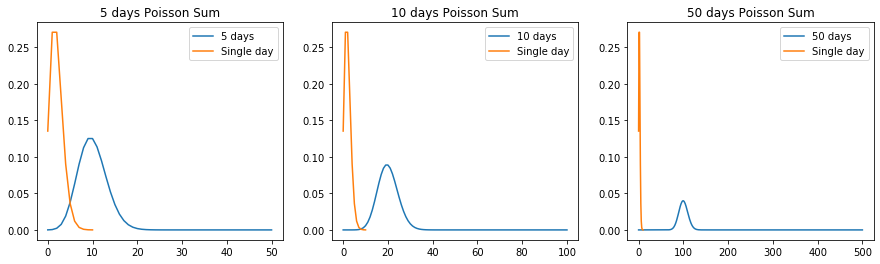

In [112]:
fig, (ax, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 4))
days = 5
x = np.linspace(0, 10, 11)
err_y = stats.poisson.pmf(x, err_mu, offset)
y = np.convolve(err_y, err_y)
for i in range (2, days):
    y = np.convolve(y, err_y)
ax.plot(y, label = f'{days} days')
ax.plot(x, err_y, label = 'Single day')
days = 10
x = np.linspace(0, 10, 11)
err_y = stats.poisson.pmf(x, err_mu, offset)
y = np.convolve(err_y, err_y)
for i in range (2, days):
    y = np.convolve(y, err_y)
ax2.plot(y, label = f'{days} days')
ax2.plot(x, err_y, label = 'Single day')
days = 50
x = np.linspace(0, 10, 11)
err_y = stats.poisson.pmf(x, err_mu, offset)
y = np.convolve(err_y, err_y)
for i in range (2, days):
    y = np.convolve(y, err_y)
ax3.plot(y, label = f'{days} days')
ax3.plot(x, err_y, label = 'Single day')

ax.set_title('5 days Poisson Sum'); ax.legend()
ax2.set_title('10 days Poisson Sum'); ax2.legend()
ax3.set_title('50 days Poisson Sum'); ax3.legend()

After 5 days of convolution, the distribution is still Poissonian. This is because the convolution essentially changes the experiment from a single day with an average of 2 hits to an experiment over 5 days with an average of 1

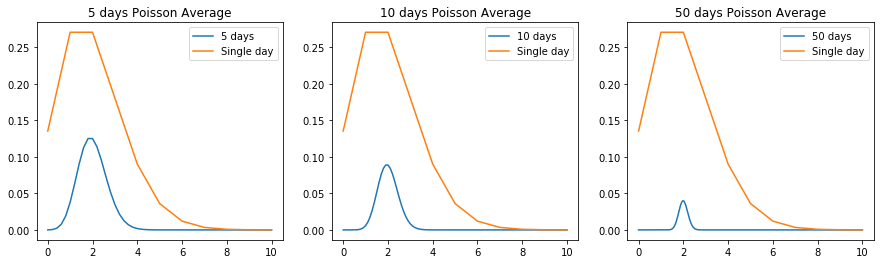

In [132]:
fig, (ax, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 4))
days = 5
x = np.linspace(0, 10, 11)
err_y = stats.poisson.pmf(x, err_mu, offset)
y = np.convolve(err_y, err_y)
for i in range (2, days):
    y = np.convolve(y, err_y)
new_x = np.linspace(0, 10*days, 10*days+1)/days
ax.plot(new_x, y, label = f'{days} days')
ax.plot(x, err_y, label = 'Single day')
days = 10
x = np.linspace(0, 10, 11)
err_y = stats.poisson.pmf(x, err_mu, offset)
y = np.convolve(err_y, err_y)
for i in range (2, days):
    y = np.convolve(y, err_y)
new_x = np.linspace(0, 10*days, 10*days+1)/days
ax2.plot(new_x, y, label = f'{days} days')
ax2.plot(x, err_y, label = 'Single day')
days = 50
x = np.linspace(0, 10, 11)
err_y = stats.poisson.pmf(x, err_mu, offset)
y = np.convolve(err_y, err_y)
for i in range (2, days):
    y = np.convolve(y, err_y)
new_x = np.linspace(0, 10*days, 10*days+1)/days
ax3.plot(new_x, y, label = f'{days} days')
ax3.plot(x, err_y, label = 'Single day')

ax.set_title('5 days Poisson Average'); ax.legend()
ax2.set_title('10 days Poisson Average'); ax2.legend()
ax3.set_title('50 days Poisson Average'); ax3.legend()